In [1]:
options(stringsAsFactors = FALSE, warn = -1,
        repr.plot.res = 200,
        repr.plot.width=8, repr.plot.height=4.5)

## install devtools if not installed
if(!("devtools" %in% rownames(installed.packages()))){
  install.packages("devtools",  repos = c(CRAN = "http://cran.rstudio.com"))
  }

## install bmetenrichr if not installed
if(!("bmetenrichr" %in% rownames(installed.packages()))){
   devtools::install_github(repo = "martijnmolenaar/bmetenrichr")
}


In [3]:
library(bmetenrichr)

## simple anlayses using LION

In [4]:
## load example data 
data("Rappez_et_al")

In [5]:
## example sc_matrix
## is SpaceM dataset from Rappez et al. (2022) Nat. Methods.

Rappez_et_al$sc_matrix[1:10,1:10]

,8,15,18,25,27,29,35,38,41,47
C10H10N4O.K,0.01145815,0.0000000,0.00000000,0.00000000,0.00000000,0.008558847,0.000000000,0.00000000,0.000000000,0.000000000
C10H10O6.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.006726224
C10H11N4O7P.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.005782876,0.02968958,0.000000000,0.000000000
C10H11N5O3.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.H,0.01707534,0.0620677,0.05203464,0.01376432,0.02417577,0.028755533,0.030977567,0.03611660,0.009692678,0.031959898
C10H12ClNO4.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.Na,0.17496077,0.1702377,0.17311070,0.16992632,0.01635700,0.174631645,0.147417684,0.12427280,0.160955912,0.120047020
C10H12FN5O4.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000


In [6]:
## example annotations
rownames(Rappez_et_al$sc_matrix)[1:10]

[1] "C10H10N4O.K"     "C10H10O6.K"      "C10H11N4O7P.Na"  "C10H11N5O3.H"   
 [5] "C10H12ClN5O3.K"  "C10H12ClN5O3.Na" "C10H12ClNO4.H"   "C10H12ClNO4.K"  
 [9] "C10H12ClNO4.Na"  "C10H12FN5O4.H"

In [7]:
## conditions in example
Rappez_et_al$conditions[1:10]

[1] "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"

In [8]:
## should the annotations be included in the analysis? 
Rappez_et_al$cellular[1:10]

C10H10N4O.K      C10H10O6.K  C10H11N4O7P.Na    C10H11N5O3.H  C10H12ClN5O3.K 
          FALSE           FALSE           FALSE            TRUE           FALSE 
C10H12ClN5O3.Na   C10H12ClNO4.H   C10H12ClNO4.K  C10H12ClNO4.Na   C10H12FN5O4.H 
          FALSE           FALSE           FALSE           FALSE           FALSE

In [9]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix,
                 annotations = rownames(Rappez_et_al$sc_matrix),
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )


Parsing isomers...
single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [10]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [11]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


35.52% of annotations were matched to pathway




Perform enrichment analysis...


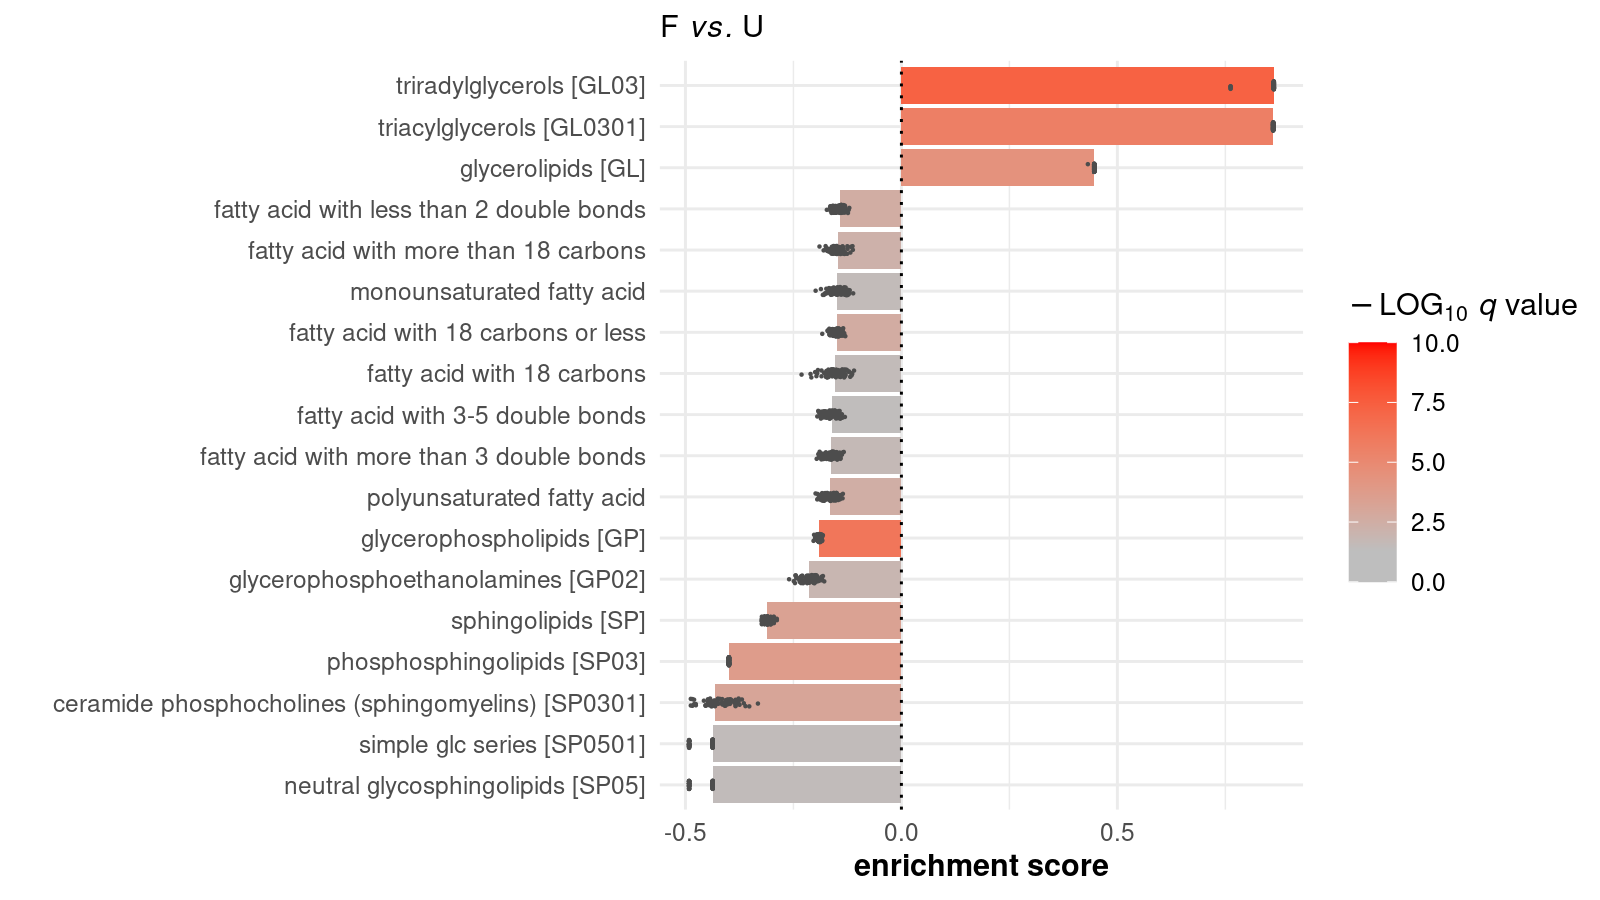

In [12]:
## plot enrichment analysis, with enrichment score (ES) on x-axis

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, by.statistic = "ES")

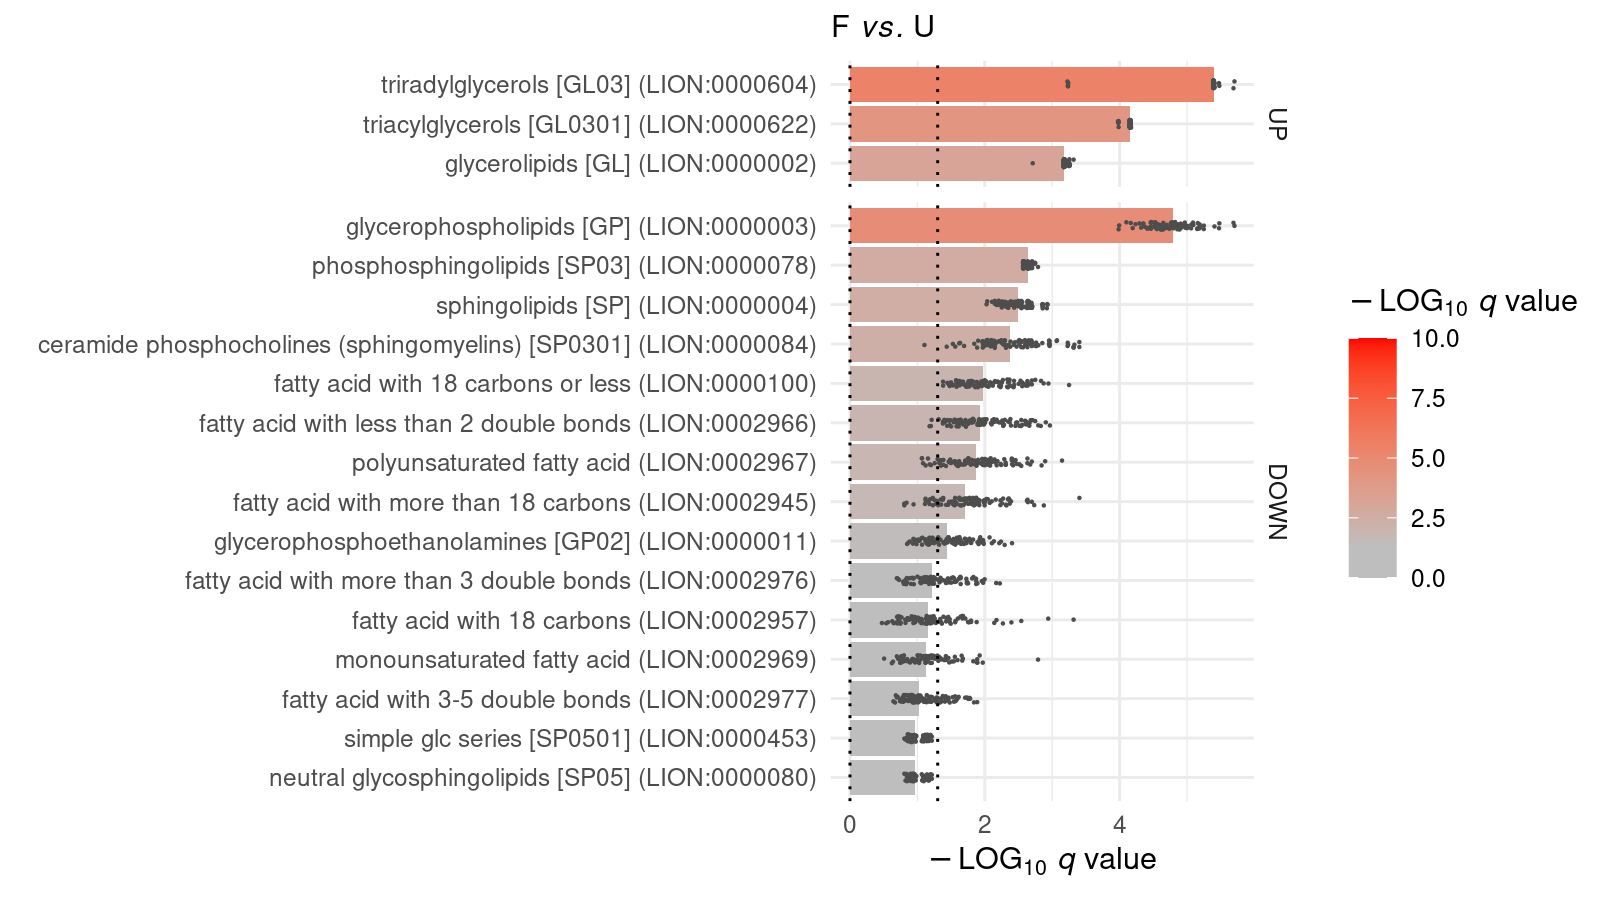

In [13]:
## plot enrichment analysis, now with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

In [14]:
## export enrichment table

enrichmentTable(myTestRun)

LION_ID,LION_name,n,ES_median,ES_sd,p.value_median,p.value_sd,q.value_median,q.value_sd,fraction.bootstrap.presence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LION:0000604,triradylglycerols [GL03],9.0,0.8622590,0.021932022,4.596620e-08,4.378734e-06,4.045026e-06,1.272870e-04,1.00
LION:0000003,glycerophospholipids [GP],291.0,-0.1904214,0.004193538,3.672013e-07,3.172228e-07,1.624866e-05,1.849502e-05,1.00
LION:0000622,triacylglycerols [GL0301],7.0,0.8606783,0.000000000,2.380995e-06,0.000000e+00,6.984253e-05,7.608769e-06,1.00
LION:0000002,glycerolipids [GL],28.0,0.4463952,0.001471141,3.787071e-05,7.132690e-06,6.665246e-04,1.339265e-04,1.00
LION:0000078,phosphosphingolipids [SP03],30.0,-0.3992509,0.000000000,1.823436e-04,0.000000e+00,2.292319e-03,2.670849e-04,1.00
LION:0000004,sphingolipids [SP],49.0,-0.3102381,0.008735526,2.908494e-04,1.904132e-04,3.162987e-03,1.814117e-03,1.00
LION:0000084,ceramide phosphocholines (sphingomyelins) [SP0301],24.0,-0.4314257,0.031393365,4.248168e-04,1.881687e-03,4.164740e-03,9.675651e-03,1.00
LION:0000100,fatty acid with 18 carbons or less,207.0,-0.1485945,0.010015412,1.187029e-03,1.382894e-03,1.062792e-02,9.633011e-03,1.00
LION:0002966,fatty acid with less than 2 double bonds,221.0,-0.1430989,0.011013420,1.405775e-03,2.158551e-03,1.172508e-02,1.397063e-02,1.00


In [15]:
## now, let's test FIT vs F

myTestRun <-  setConditions(object = myTestRun, condition.x = 'F', condition.y = 'FIT')
myTestRun

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: F 
condition.y: FIT 

In [16]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 24 (2.19%)



In [17]:

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


15.66% of annotations were matched to pathway




Perform enrichment analysis...


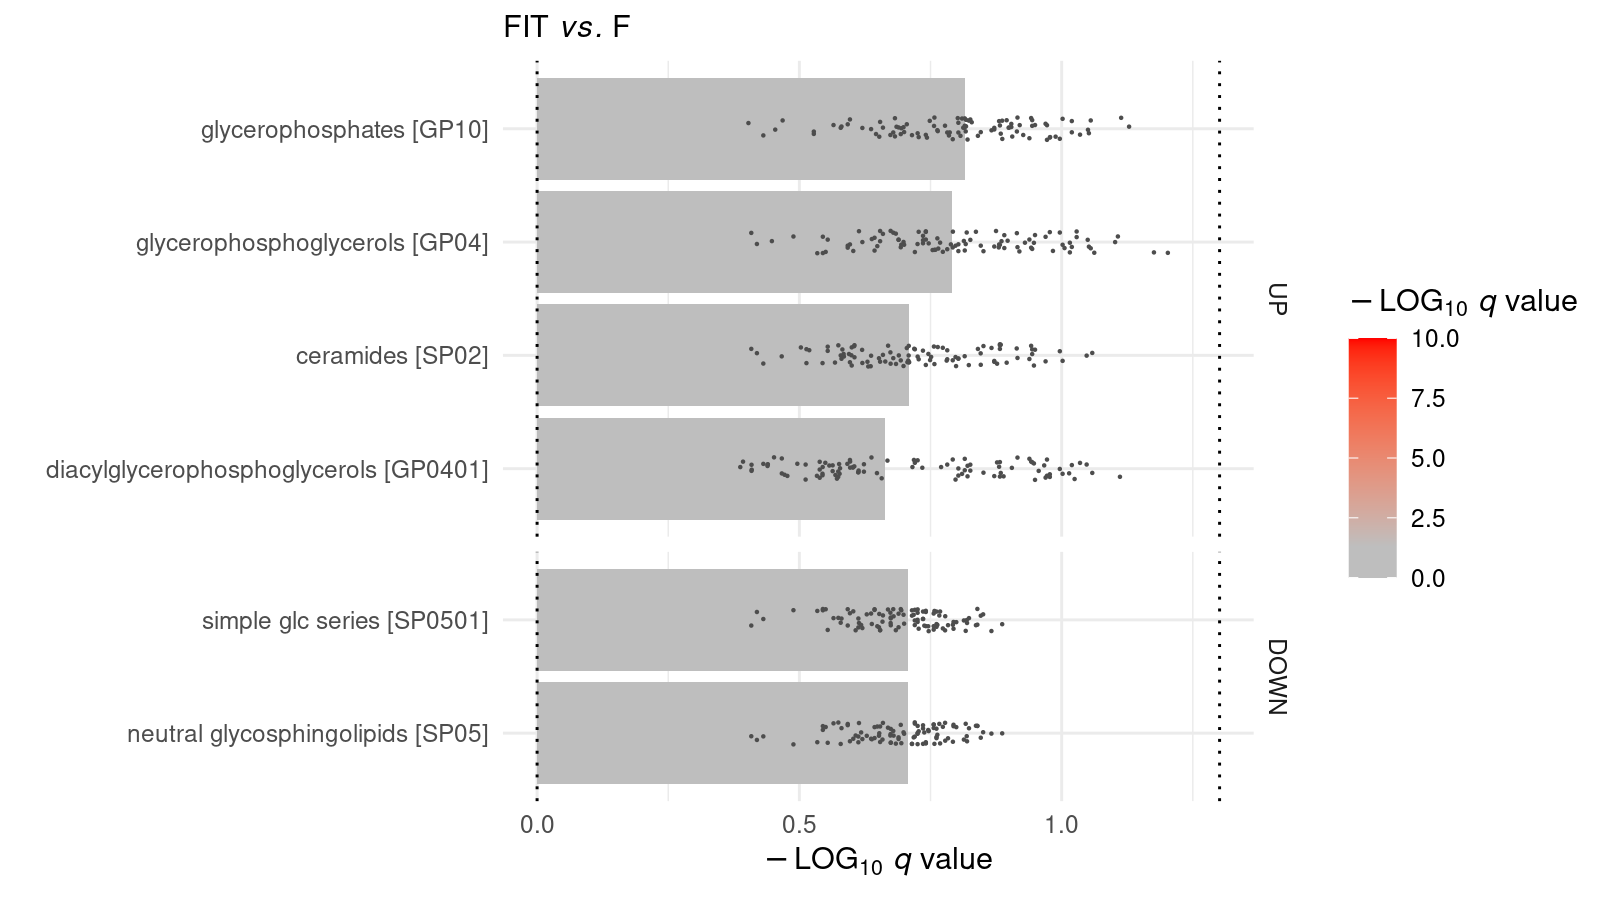

In [18]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

## run LION enrichment with including isobars

In [19]:
## it's possible to expand the analysis by including isobars (by default, only isomers are included)
## isobars are predicted under the hood, no specific data is required
## except:
##  - for polarization_mode ('positive' or 'negative')
##  - mass_range_ppm

## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 isobars = TRUE,                      ## to include isobars (default is FALSE)
                 mass_range_ppm = 3,                  ## mass range to define isobars
                 polarization_mode = "positive",      ## mode, is important to include the right adducts
                 annotations = rownames(Rappez_et_al$sc_matrix), 
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )

polarization_mode is: positive




Parsing isomers...
Parsing potential isobars...

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [20]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [21]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


35.43% of annotations were matched to pathway




Perform enrichment analysis...


In [22]:
## example of the annotations, that now also include isobars

myTestRun$annotations[sample(which(sapply(myTestRun$isobars_list, length) > 1), size = 1)]

[[1]]
                                          isomer 
                                      "PG(38:5)" 
                                         isobar1 
                         "PC(16:0/18:2(9Z,12Z))" 
                                         isobar2 
                        "PC(18:1(11E)/16:1(6Z))" 
                                         isobar3 
                        "PC(18:1(11E)/16:1(9Z))" 
                                         isobar4 
                        "PC(20:2(11Z,14Z)/14:0)" 
                                         isobar5 
                        "PC(20:1(11Z)/14:1(9Z))" 
                                         isobar6 
                        "PC(18:1(11Z)/16:1(6Z))" 
                                         isobar7 
                        "PC(18:1(11Z)/16:1(9Z))" 
                                         isobar8 
                        "PC(22:2(13Z,16Z)/12:0)" 
                                         isobar9 
                        "PC(16:1(6Z)/18:1(11E))" 
                                        isobar10 
                        "PC(16:1(6Z)/18:1(11Z))" 
                                        isobar11 
                         "PC(16:1(6Z)/18:1(6Z))" 
                                        isobar12 
                         "PC(16:1(6Z)/18:1(9Z))" 
                                        isobar13 
                         "PC(18:1(6Z)/16:1(6Z))" 
                                        isobar14 
                         "PC(18:1(6Z)/16:1(9Z))" 
                                        isobar15 
                         "PC(18:2(9Z,11E)/16:0)" 
                                        isobar16 
                         "PC(16:2(9Z,12Z)/18:0)" 
                                        isobar17 
                         "PC(18:2(9Z,12Z)/16:0)" 
                                        isobar18 
                        "PC(16:1(9Z)/18:1(11E))" 
                                        isobar19 
                        "PC(16:1(9Z)/18:1(11Z))" 
                                        isobar20 
                         "PC(16:1(9Z)/18:1(6Z))" 
                                        isobar21 
                         "PC(16:1(9Z)/18:1(9Z))" 
                                        isobar22 
                         "PC(18:1(9Z)/16:1(6Z))" 
                                        isobar23 
                         "PC(18:1(9Z)/16:1(9Z))" 
                                        isobar24 
                        "PC(14:1(9Z)/20:1(11Z))" 
                                        isobar25 
                        "PC(12:0/22:2(13Z,16Z))" 
                                        isobar26 
                         "PC(16:0/18:2(9Z,11E))" 
                                        isobar27 
                         "PC(18:0/16:2(9Z,12Z))" 
                                        isobar28 
                        "PC(14:0/20:2(11Z,14Z))" 
                                        isobar29 
"PE(O-18:2(9Z,12Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" 
                                        isobar30 
                        "PE(20:2(11Z,14Z)/17:0)" 
                                        isobar31 
                        "PE(15:0/22:2(13Z,16Z))" 
                                        isobar32 
                        "PE(22:2(13Z,16Z)/15:0)" 
                                        isobar33 
                        "PE(17:0/20:2(11Z,14Z))" 
                                        isobar34 
                         "PE(18:2(9Z,11E)/19:0)" 
                                        isobar35 
                         "PE(16:2(9Z,12Z)/21:0)" 
                                        isobar36 
                         "PE(18:2(9Z,12Z)/19:0)" 
                                        isobar37 
                         "PE(21:0/16:2(9Z,12Z))" 
                                        isobar38 
                         "PE(19:0/18:2(9Z,11E))" 
                                        isobar39 
                         "PE(19:0/18:2(9Z,12

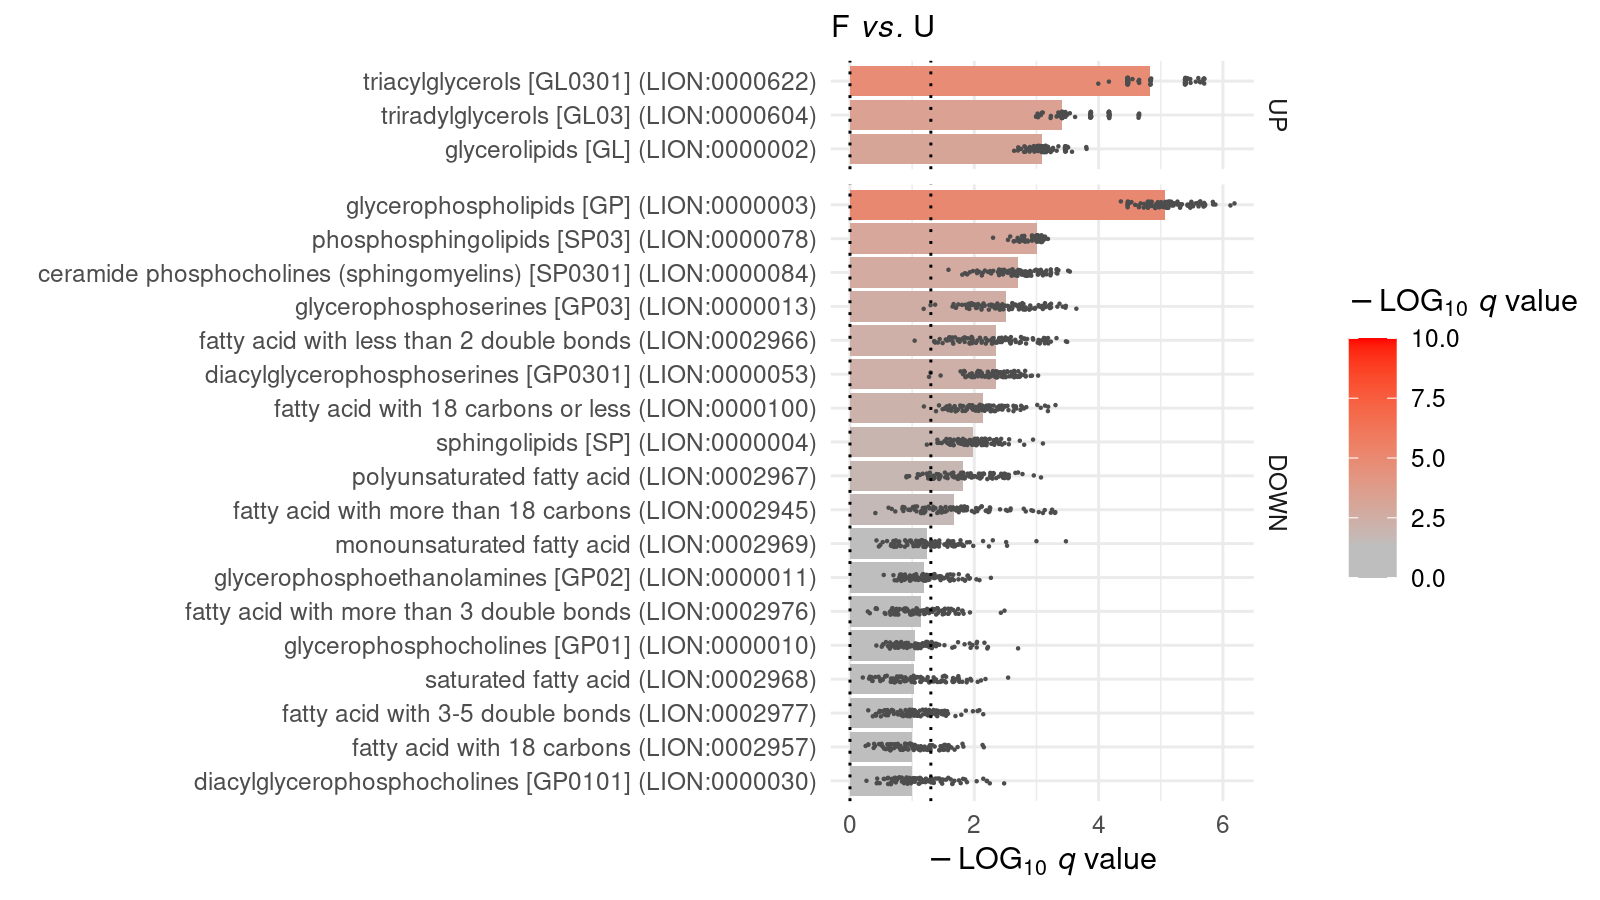

In [23]:
## plot enrichment analysis, with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

## custom analyses

In [24]:
## it's possible to use a custom metabolite set enrichment pathway
## this should be formatted as a names list, with each element a vector of the metabolites within the set

myPathway <- myTestRun$pathway_list[sample(100, size = 20)]

str(myPathway)

List of 20
 $ LION:0000010: chr [1:1536] "LysoPC(14:0)" "LysoPC(15:0)" "LysoPC(16:0)" "LysoPC(16:1(9Z))" ...
 $ LION:0000002: chr [1:1510] "DG(10:0/0:0/8:0)" "DG(10:0/8:0/0:0)" "DG(11D3/13M5/0:0)" "DG(11D5/11M5/0:0)" ...
 $ LION:0002955: chr [1:1431] "CDP-DG(16:1(9Z)/20:4(5Z,8Z,11Z,14Z))" "CPA(16:0/0:0)" "DG(16:0/0:0/16:0)" "DG(16:0/0:0/20:3n9)" ...
 $ LION:0000034: chr [1:69] "LysoPC(14:0)" "LysoPC(15:0)" "LysoPC(16:0)" "LysoPC(16:1(9Z))" ...
 $ LION:0000022: chr [1:43] "CDP-DG(16:1(9Z)/20:4(5Z,8Z,11Z,14Z))" "CDP-DG(18:2(9Z,12Z)/18:3(6Z,9Z,12Z))" "CDP-DG(18:2(9Z,12Z)/18:3(9Z,12Z,15Z))" "CDP-DG(18:3(6Z,9Z,12Z)/18:2(9Z,12Z))" ...
 $ LION:0000059: chr [1:84] "PG(18:0/18:1(11Z))" "PG(18:0/18:1(9Z))" "PG(18:0/18:2(9Z,12Z))" "PG(18:1(11Z)/18:0)" ...
 $ LION:0002974: chr [1:392] "PA(16:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" "PA(16:1(9Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" "PA(18:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" "PA(18:3(6Z,9Z,12Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" ...
 $ LION:0000562: chr [1:3] "Cholestenone"

In [25]:
## also, custom annotations can be provided as list
my_annotations <- myTestRun$annotations
str(my_annotations[825:829])

List of 5
 $ : Named chr [1:3] "PI(4:0/4:0)" "PI(2:0/6:0)" "PI(6:0/2:0)"
  ..- attr(*, "names")= chr [1:3] "isomer1" "isomer2" "isomer3"
 $ : chr(0) 
 $ : chr(0) 
 $ : Named chr [1:10] "PC(6:0/3:0)" "PC(3:0/6:0)" "PE(6:0/6:0)" "PE(2:0/10:0)" ...
  ..- attr(*, "names")= chr [1:10] "isomer1" "isomer2" "isomer3" "isomer4" ...
 $ : Named chr [1:10] "PC(6:0/3:0)" "PC(3:0/6:0)" "PE(6:0/6:0)" "PE(2:0/10:0)" ...
  ..- attr(*, "names")= chr [1:10] "isomer1" "isomer2" "isomer3" "isomer4" ...


In [26]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 pathway = myPathway, 
                 termsOfInterest = "all",   ## to include 'all' terms
                 annotations = my_annotations,
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular, 
                 condition.x = "U",
                 condition.y = "F"                    )

ERROR: Error in if (termsOfInterest == "selection" & pathway == "LION") {: the condition has length > 1


In [ ]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

In [ ]:

myTestRun <- calcEnrichment(myTestRun, n = 20)

In [ ]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

In [ ]:
## export enrichment table

enrichmentTable(myTestRun)